In [346]:
import dataIO 
%matplotlib inline

# import os 
# print (os.getcwd()) #현재 디렉토리의


myData = dataIO.DataNIRSIT()
print(dir(myData))

DIR = 'C:/Users/LCM/Desktop/PyAnalysisTool/examples/'
file_name = '170103 1529_spike _test_000449_rest_Raw.csv'
myData.set_data(DIR+file_name, 'csv')


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'accel', 'age', 'battery', 'block_mbll', 'ch_rej', 'dOD', 'data_length', 'date', 'gyro', 'id_num', 'inspector', 'marker', 'mbll', 'name', 'num_data', 'perf_accuracy', 'perf_reaction_time', 'raw', 'send_data', 'set_data', 'set_meta_information', 'set_performance', 'set_task_block', 'sex', 'snr_calibration', 'snrmap', 'task_block', 'task_duration', 'task_name', 'timestamp']
file loading.....
done.....


In [347]:

# myData.snr
A = myData.snr_calibration
B = A[list(range(3, 10, 2))]

print(myData.raw.d780.shape)
print(myData.raw.d850.shape)
print(myData.battery.shape)
print(myData.accel.shape)
print(myData.gyro.shape)


# strmat = ['gyro','accel']
# print(strmat[0])
# print(myData[strmat[0]].shape)


(204, 6741)
(204, 6741)
(6741,)
(3, 6741)
(3, 6741)


In [349]:
import dataIO 
raw780 = myData.raw.d780.values
raw850 = myData.raw.d850.values
spec = dataIO.DataSpec()





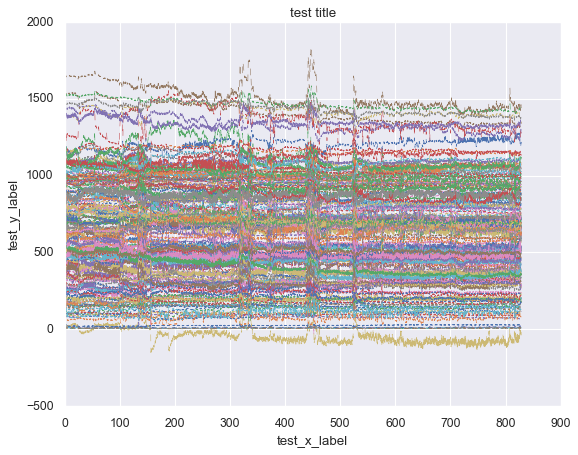

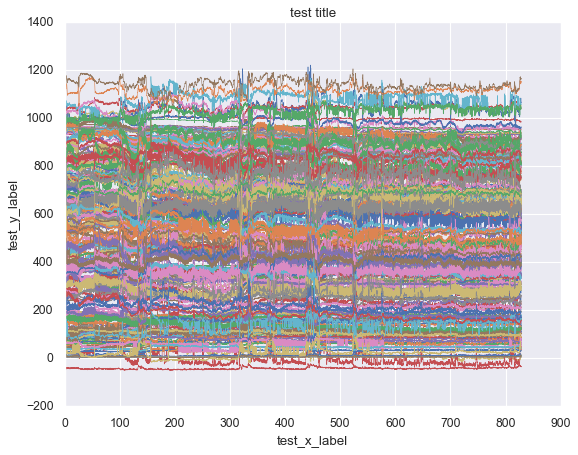

In [352]:
import dataVisualization as dV

ts_graph1 = dV.TimeSeriesPlot()

timestamp = myData.timestamp
ts_graph1.set_x_values(timestamp)
ts_graph1.set_y_values(raw780)
ts_graph1.set_label('test_x_label', 'test_y_label', 'test title')
ts_graph1.draw_now(99, '--')


ts_graph2 = dV.TimeSeriesPlot()

timestamp = myData.timestamp
ts_graph2.set_x_values(timestamp)
ts_graph2.set_y_values(raw850)
ts_graph2.set_label('test_x_label', 'test_y_label', 'test title')
ts_graph2.draw_now(79, '-')


In [354]:
import dataPreProcess as dpp
bpf780 = dpp.bpf(raw780, spec)
bpf850 = dpp.bpf(raw850, spec)

print(bpf850.shape)

bandpass filter applied ...
time collapsed : 0.2080373764038086
bandpass filter applied ...
time collapsed : 0.24805641174316406
(204, 6741)


In [355]:
import dataPreProcess as dpp
snr780 = dpp.snr(bpf780, spec)
snr850 = dpp.snr(bpf850, spec)


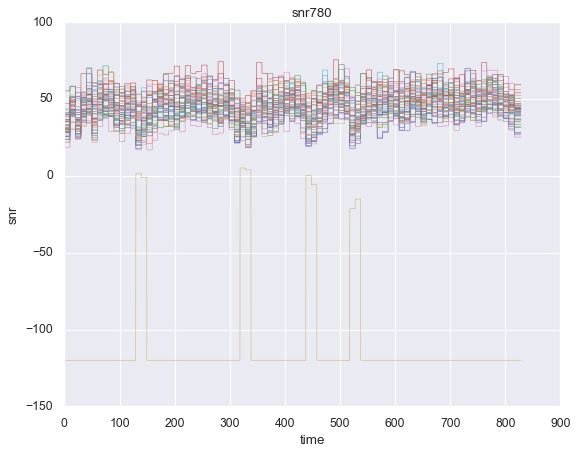

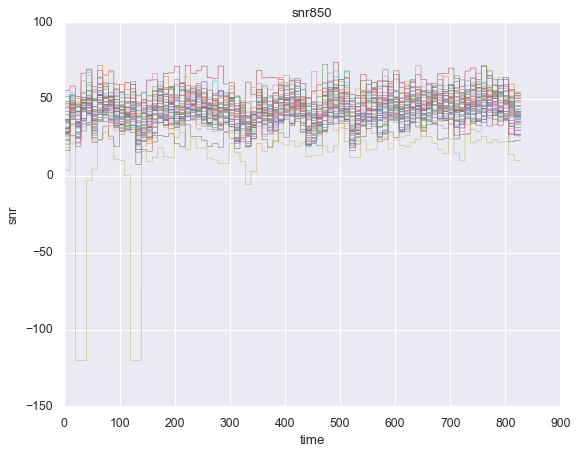

In [356]:
import dataVisualization as dv

ts_graph1 = dv.TimeSeriesPlot()

timestamp = myData.timestamp
ts_graph1.set_x_values(timestamp)
ts_graph1.set_y_values(snr780[0:48, :])
ts_graph1.set_label('time', 'snr', 'snr780')
ts_graph1.draw_now(1, '-')


ts_graph2 = dv.TimeSeriesPlot()

ts_graph2.set_x_values(timestamp)
ts_graph2.set_y_values(snr850[0:48, :])
ts_graph2.set_label('time', 'snr', 'snr850')
ts_graph2.draw_now(4, '-')



In [357]:
import dataPreProcess as dpp
dod780 = dpp.find_dod(bpf780, spec)
dod850 = dpp.find_dod(bpf850, spec)




find dOD applied ...
time collapsed : 0.25005578994750977
find dOD applied ...
time collapsed : 0.29506564140319824


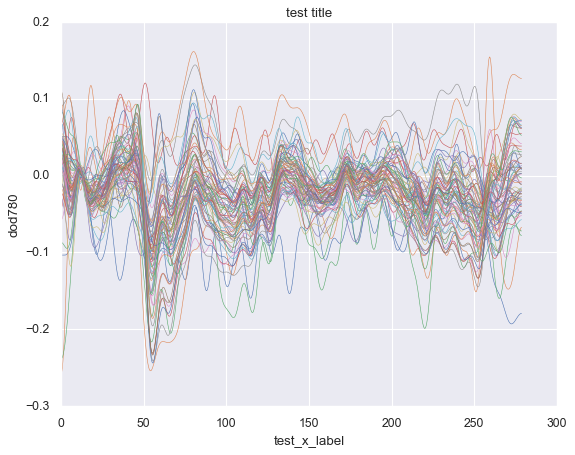

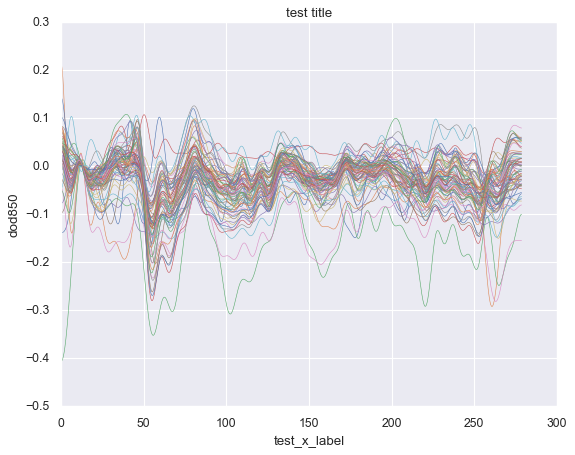

In [9]:
import dataVisualization as dv

ts_graph1 = dv.TimeSeriesPlot()

timestamp = myData.timestamp
ts_graph1.set_x_values(timestamp)
ts_graph1.set_y_values(dod780[0:68, :])
ts_graph1.set_label('test_x_label', 'dod780', 'test title')
ts_graph1.draw_now(3, '-')

ts_graph2 = dv.TimeSeriesPlot()

timestamp = myData.timestamp
ts_graph2.set_x_values(timestamp)
ts_graph2.set_y_values(dod850[0:68, :])
ts_graph2.set_label('test_x_label', 'dod850', 'test title')
ts_graph2.draw_now(4, '-')


In [358]:
import dataPreProcess as dp

hbo, hbr, hbt = dp.find_mbll(dod780, dod850, spec)


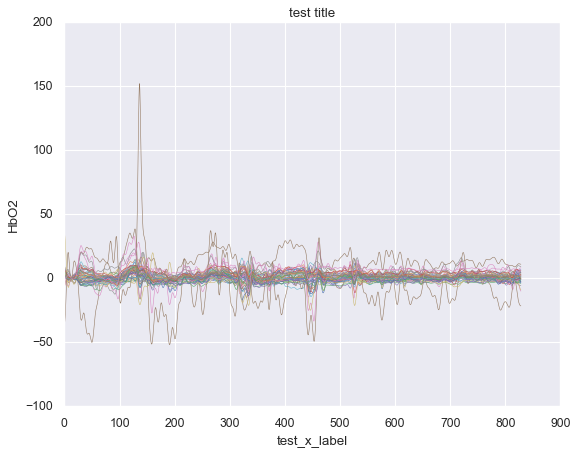

In [359]:
import dataVisualization as dv

ts_graph1 = dv.TimeSeriesPlot()

timestamp = myData.timestamp
ts_graph1.set_x_values(timestamp)
ts_graph1.set_y_values(hbo[0:48, :])
ts_graph1.set_label('test_x_label', 'HbO2', 'test title')
ts_graph1.draw_now(12, '-')




In [12]:
import numpy as np

import dataPreProcess as dpp 


In [360]:


ch_rej = dpp.find_ch_rej(raw780, raw850, snr780, snr850, hbo, hbr, spec)
print(ch_rej.shape)

# A = np.array([1,2,3,4])
# B = np.array([5,6,3,4])
# C = np.vstack((A,B))
# 
# rd7 = np.array(((1,2,3,4),(5,6,7,8)))
# rd77 =rd7<5
# print(rd77)
#                
# temp = rd7 < 0
# print(temp.shape())
# print(np.sum(rd7 < 0, axis=1))
# print(C)

(204,)


In [361]:
hbo, ch_rej = dpp.padding_ch3(hbo, ch_rej,spec)
hbr, _ = dpp.padding_ch3(hbr, ch_rej,spec)
hbt = hbo + hbr

print(hbo.shape)


(48, 6741)


In [367]:

def clustering_ch(sig_input, reject_ch):
    # 영역별로 clustering 하는 함수 
    # 최하단에는 global signal subtraction 을 넣어두었음. 안쓰면 말고 
    
    brodmannpadding = [[1, 2, 3, 5, 6, 11, 17, 18],
                       [4, 9, 10],
                       [7, 8, 12, 13, 21, 22, 25, 26],
                       [14, 15, 16, 29, 30],
                       [19, 20, 33, 34, 35, 38, 39, 43],
                       [40, 44, 45],
                       [23, 24, 27, 28, 36, 37, 41, 42],
                       [31, 32, 46, 47, 48]]
    brodmannpadding.append(brodmannpadding[0] + brodmannpadding[1] + brodmannpadding[2] + brodmannpadding[3])
    brodmannpadding.append(brodmannpadding[4] + brodmannpadding[5] + brodmannpadding[6] + brodmannpadding[7])
    brodmannpadding.append(brodmannpadding[8] + brodmannpadding[9])
    num_region = len(brodmannpadding)
    
    sig_avg = np.zeros(sig_input.shape)
    sig_out = np.zeros((num_region, sig_input.shape[1]))
    sig_all_out_ind = np.zeros(num_region)   # region 전체가 나간경우를 기록하는 것 
    
    for bp in range(num_region):
        t = 1
        for i in brodmannpadding[bp]:
            if reject_ch[i] is False:
                sig_avg[t, :] = sig_input[i, :]
                t = t + 1
        if t > 1:  # 없는 채널이 1개 이상일 경우
            if t is 2:
                avgHbOs = sig_avg[1, :]
            else:
                avgHbOs = sig_avg[:t-1, :].mean(axis=1)
            sig_out[bp, :] = avgHbOs
        else:
            # 해당 영역에 통과하는 값이 하나도 없는 경우.. 
            # 일단 zeros 그대로 두자 
            sig_all_out_ind[bp] = 1

    return sig_out, sig_all_out_ind


In [368]:
cmbll_hbo, cmbll_hbo_ind = clustering_ch(hbo, ch_rej)
cmbll_hbr, cmbll_hbr_ind = clustering_ch(hbr, ch_rej)

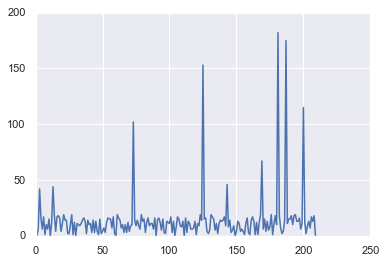

In [369]:
import numpy as np                    
import matplotlib.pyplot as plt 
%matplotlib inline
random_number1 =np.random.randint(0,200,10)
random_number2=np.random.randint(0,20,200)
random_number=np.concatenate((random_number1,random_number2))
np.random.shuffle(random_number)

plt.plot(random_number)


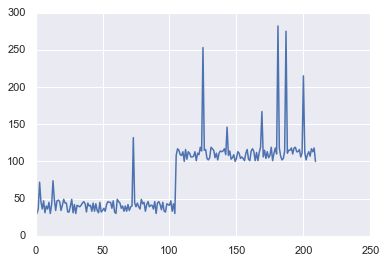

In [370]:

random_number[int(len(random_number)/2):] += 100
random_number[:int(len(random_number)/2)] += 30
plt.plot(random_number)

In [505]:
import scipy
from scipy.fftpack import dct
from scipy.fftpack import idct
import math
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import FastICA
import statsmodels.api as sm
import csaps


def spike_remove_ica(input_signal, n_comp=3, target_ind=2):
    input_signal3 = input_signal.copy().reshape(-1, 1)
    ica = FastICA(n_components=n_comp)
    
    print(input_signal3.shape)
    ica.fit(input_signal3)
    components = ica.transform(input_signal3)
    # looks like component #2 (brown) contains the eye blinks
    # let's remove them (hard coded)!
    components[target_ind:] = 0

    # reconstruct EEG without blinks
    spike_removed = ica.inverse_transform(components)
    return spike_removed.ravel()


def hampel(input_signal, k=7, t0=3.0):
    """
    input_signal: pandas series of values from which to remove outliers
    k: size of window (including the sample; 7 is equal to 3 on either side of value)
    """
    # Make copy so original not edited
    m_side = (k)  #k/2
    input_signal3 = input_signal.copy()[:, None]
    input_signal2 = pd.DataFrame(input_signal.copy())
    # Hampel Filter
    l_factor = 1.4826
    rolling_median = input_signal2.rolling(k).median()
    difference = np.abs(rolling_median-input_signal2)
    median_abs_deviation = difference.rolling(k).median()
    threshold = t0 * l_factor * median_abs_deviation
    outlier_idx = difference > threshold
    input_signal3[outlier_idx] = math.nan
    for i in np.where(outlier_idx)[0]:
        start_ind = max([0, int(i-m_side)])
        end_ind = min((len(input_signal3), int(i+m_side)))
        input_signal3[i] = np.nanmedian(input_signal3[start_ind:end_ind])
    # input_signal3[outlier_idx] = 0
    return input_signal3.ravel()


def spike_removal_ch(input_signal):
    # TODO: 동작에 따른 검증 필요
    # mode_num = spike removal algorithm (0=off)
    # mode_num2 = step removal algorithm (0=off)

    # spike removal
    # X에 대한 rolling median 으로 spike removal
    spike_removed = hampel(input_signal, 150, 2.5)
    
    # step removal
    # diff(X) 에 대한 rolling median 으로 step removal
    input_for_step_removing = np.diff(spike_removed)
    spike_removed_init = spike_removed[0]
    step_removed = hampel(input_for_step_removing, 300, 3)
    step_removed = hampel(step_removed, 450, 3)
    noise_removed = np.concatenate(([spike_removed_init], step_removed)).cumsum()
    
    noise_removed = hampel(noise_removed, 150, 3)
    return noise_removed


def spike_removal(input_signal, spec):
    input_signal_copy = input_signal.copy()
    nch = spec.CH
    for i in range(nch):
        # spike removal(2), step removal(2)
        input_signal_copy[i, :] = spike_removal_ch(input_signal_copy[i, :])
    return input_signal_copy


In [506]:
input_signal = np.array(hbo)
output = spike_removal(input_signal, spec)
t = np.arange(0, input_signal.shape[1], 1)





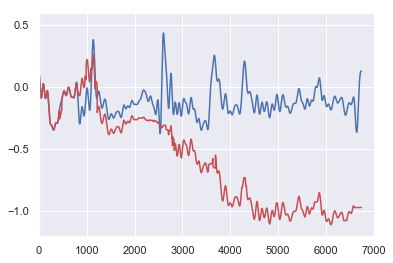

In [507]:
plot_target_ch_ind = 3

plt.plot(t, input_signal[plot_target_ch_ind, :], '-b')
plt.plot(t, output[plot_target_ch_ind, :], '-r')
# plt.gca().legend(('original', 'modified'))

